In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
inflows = pd.read_parquet("data/ucsd-inflows.pqt")
outflows = pd.read_parquet("data/ucsd-outflows.pqt")

In [3]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [4]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


## Week 1: Data Exploration

In [ ]:
#get info about inflows and outflows columns dtypes
inflows_info = inflows.info()
outflows_info = outflows.info()

In [ ]:
# checking if inflows have any nans
inflows_missing = inflows.isna().sum()
inflows_missing

In [ ]:
# checking if outflows have any nans
outflows_missing = outflows.isna().sum()
outflows_missing

In [ ]:
# summary statistics for inflows' amount
inflows_stats = inflows['amount'].describe()
inflows_stats

In [ ]:
# summary statistics for outflows' amount
outflows_stats = outflows['amount'].describe()
outflows_stats

In [ ]:
# checking number of unique values for each inflow column
inflows_unique_counts = inflows.nunique()
inflows_unique_counts

In [ ]:
# checking number of unique values for each outflow columns
outflows_unique_counts = outflows.nunique()
outflows_unique_counts

In [ ]:
# checking numbers of different memos in inflows
inflows_memo_ct = inflows['memo'].value_counts()
inflows_memo_ct

In [ ]:
# checking number of different categories for inflows
inflows_cat_ct = inflows['category'].value_counts()
inflows_cat_ct

In [ ]:
# bar chart to show the distribution of categories for inflows
inflows_cat_ct.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.title('Category Distribution for Inflows')
plt.tight_layout()
plt.show()




In [ ]:
# checking number of different categories for outflows

outflows_cat_ct = outflows['category'].value_counts()
outflows_cat_ct

In [ ]:
# checking numbers of different memos in outflows
outflows_memo_ct = outflows['memo'].value_counts()
outflows_memo_ct

In [ ]:
# bar chart to show distribution of categories in outflows
outflows_cat_ct.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.title('Category Distribution for Outflows')

plt.tight_layout()
plt.show()

In [ ]:
# checking number of memos in outflows that does not make it's category
outflows_mismatched_categories = outflows[outflows['memo'] != outflows['category']]['category']

print("\nMismatched categories in outflows:")
print(outflows_mismatched_categories.unique())


In [ ]:
outflows['memo'].head(10)

In [ ]:
# Plot to show the average monthly transactions across all of the years for both inflows and outflows
inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])
outflows['posted_date'] = pd.to_datetime(outflows['posted_date'])

inflows['month'] = inflows['posted_date'].dt.month
outflows['month'] = outflows['posted_date'].dt.month

inflows_monthly_avg = inflows.groupby('month')['amount'].mean().to_numpy()
outflows_monthly_avg = outflows.groupby('month')['amount'].mean().to_numpy()

plt.figure(figsize=(12, 6))

months = range(1, 13)  

plt.plot(months, inflows_monthly_avg, label='Average Inflows', color='blue', marker='o')
plt.plot(months, outflows_monthly_avg, label='Average Outflows', color='red', marker='o')

plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.title('Average Monthly Transaction Trends Across All Years')
plt.xticks(ticks=months, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
# Heatmap to show how inflow and outflow transactions are distributed based on day of the week and month
inflows['day_of_week'] = inflows['posted_date'].dt.day_name()
inflows['month'] = inflows['posted_date'].dt.month_name()

outflows['day_of_week'] = outflows['posted_date'].dt.day_name()
outflows['month'] = outflows['posted_date'].dt.month_name()

inflows_heatmap_data = inflows.pivot_table(index='day_of_week', columns='month', values='amount', aggfunc='count')
outflows_heatmap_data = outflows.pivot_table(index='day_of_week', columns='month', values='amount', aggfunc='count')


plt.figure(figsize=(12, 6))
sns.heatmap(inflows_heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Inflow Transactions by Day of Week and Month Heat Map')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(outflows_heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title('Outflow Transactions by Day of Week and Month Heat Map')
plt.show()


In [ ]:
# show top ten memos for inflows and outflows
top_inflow_memos = inflows['memo'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_inflow_memos.plot(kind='bar', color='blue')
plt.title('Top 10 Inflow Memos')
plt.ylabel('Frequency')
plt.show()

top_outflow_memos = outflows['memo'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_outflow_memos.plot(kind='bar', color='red')
plt.title('Top 10 Outflow Memos')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Pie chart to show the porportions of inflows and outflows by category
plt.figure(figsize=(14, 6))

inflows_category_totals = inflows.groupby('category')['amount'].sum()
outflows_category_totals = outflows.groupby('category')['amount'].sum()
plt.subplot(1, 2, 1)
plt.pie(inflows_category_totals, labels=inflows_category_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Inflows by Category')

plt.subplot(1, 2, 2)
plt.pie(outflows_category_totals, labels=outflows_category_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Outflows by Category')


plt.show()


In [ ]:
# sunburst to better showcase the portions of inflows by category
pie_inflows = px.sunburst(inflows, path=['category'], values='amount', title='Sunburst of Inflows by Category')
pie_inflows.show()


In [ ]:
# sunburst to better showcase the portions of outflows by category

pie_outflows = px.sunburst(outflows, path=['category'], values='amount', title='Sunburst of Outflows by Category')
pie_outflows.show()


In [ ]:
# bar chart to show comparison between inflow and outflow amounts over the years
inflows['year'] = inflows['posted_date'].dt.year
outflows['year'] = outflows['posted_date'].dt.year

inflows_yearly = inflows.groupby('year')['amount'].sum()
outflows_yearly = outflows.groupby('year')['amount'].sum()

plt.figure(figsize=(12, 6))
plt.bar(inflows_yearly.index - 0.2, inflows_yearly.values, width=0.4, label='Inflows', color='blue')
plt.bar(outflows_yearly.index + 0.2, outflows_yearly.values, width=0.4, label='Outflows', color='red')

plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Yearly Comparison of Inflows and Outflows Amounts')
plt.legend()
plt.show()


In [ ]:
# checking the number of counts for each category and the memos
inflows_ct = inflows.groupby(['category', 'memo']).size().reset_index(name='count')
outflows_ct = outflows.groupby(['category', 'memo']).size().reset_index(name='count')

most_common_inflows = inflows_ct.loc[inflows_ct.groupby('category')['count'].idxmax()]
most_common_outflows = outflows_ct.loc[outflows_ct.groupby('category')['count'].idxmax()]

In [ ]:
most_common_inflows[['category', 'memo', 'count']]

In [ ]:
most_common_outflows[['category', 'memo', 'count']]

In [ ]:
# checking the most common outflows
most_common_outflows = most_common_outflows.sort_values('count')
plt.figure(figsize=(14, 6))
plt.barh(most_common_outflows['memo'], most_common_outflows['count'], color='red')
plt.xlabel('Number of Transactions')
plt.ylabel('memo')
plt.title('Most Common Outflows')
plt.show()


## Week 2: Splitting Data into Train and Test

In [ ]:
# getting the rows where the memo does not equal the category
mismatched_memo = outflows[~(outflows.memo == outflows.category)].reset_index().drop(columns='index')
mismatched_memo.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting customer_ids into training and testing sets
ids = outflows.prism_consumer_id.unique()
ids_memo = mismatched_memo.prism_consumer_id.unique()

train_ids, test_ids = train_test_split(ids, test_size=0.25)
train_ids_memo, test_ids_memo = train_test_split(ids_memo, test_size=0.25)

In [ ]:
# Splitting outflows and mismatched_memo data into training and testing sets based on prism_consumer_id
outflows_train = outflows[outflows['prism_consumer_id'].isin(train_ids)]
outflows_test = outflows[outflows['prism_consumer_id'].isin(test_ids)]

outflows_memo_train = mismatched_memo[mismatched_memo['prism_consumer_id'].isin(train_ids_memo)]
outflows_memo_test = mismatched_memo[mismatched_memo['prism_consumer_id'].isin(test_ids_memo)]

In [ ]:
# Outflows statistics comparison
print("\nOutflows - Training Set Statistics:")
print(outflows_memo_train['amount'].describe())
print("\nOutflows - Test Set Statistics:")
print(outflows_memo_test['amount'].describe())

In [ ]:
print("\nOutflows - Category Distribution in Train Set:")
print(outflows_train['category'].value_counts(normalize=True))

print("\nOutflows - Category Distribution in Test Set:")
print(outflows_test['category'].value_counts(normalize=True))

In [ ]:
outflows_memo_train.shape, outflows_memo_test.shape

In [ ]:
outflows['memo']

## Week 3: Cleaning Memos

In [5]:
# text file to fully inspect raw memos 
f = open('memo_original_tracy.txt', 'w')
inspect = outflows.memo.unique()

f.write(',\n'.join([str(x) for x in sorted(inspect)]))
f.close()

In [6]:
# number of unique memos prior to cleaning
outflows.memo.nunique()

528786

In [7]:
import re
# lowercase everything
outflows['clean_memo'] = outflows['memo'].str.lower()
# Removing special characters except for alphanumeric characters and spaces
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x).strip())

In [8]:
#removing dates
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'\s*\b\d{1,2}/\d{1,2}(?:/\d{2,4})?\b\s*', '', x).strip())
print(outflows['clean_memo'].head(10))

0                                      loan
1                                   atmcash
2    tst casa del rio  exp fairlawn oh 0924
3                                      loan
4                        buffalo wild wings
5                             entertainment
6                            oculus ca 0416
7                los girasoles stow oh 0308
8                  buzzis laundry 1 oh 0328
9                  buzzis laundry 1 oh 0213
Name: clean_memo, dtype: object


In [9]:
outflows['clean_memo'].unique()

array(['loan', 'atmcash', 'tst casa del rio  exp fairlawn oh 0924', ...,
       'debit card withdrawal purchaseamazon primeti40l27r3 amzncombill wa date 011623 purch xxxxxxxxxxxxxxxxxxxxxx  card 15 34',
       'pos withdrawalaz lot quiktrip xxxx xxxx e indian school rd phoenix az  card 15 xxxx  mcc xxxx',
       'pos withdrawalwalmart xxxx xxxx e mckellips rd mesa az  card 15 xxxx  mcc xxxx'],
      dtype=object)

In [10]:
#removed X's for redacted information
# outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'X+', '', x).strip())

In [11]:
outflows['clean_memo'].unique()

array(['loan', 'atmcash', 'tst casa del rio  exp fairlawn oh 0924', ...,
       'debit card withdrawal purchaseamazon primeti40l27r3 amzncombill wa date 011623 purch xxxxxxxxxxxxxxxxxxxxxx  card 15 34',
       'pos withdrawalaz lot quiktrip xxxx xxxx e indian school rd phoenix az  card 15 xxxx  mcc xxxx',
       'pos withdrawalwalmart xxxx xxxx e mckellips rd mesa az  card 15 xxxx  mcc xxxx'],
      dtype=object)

In [12]:
# Remove hashtags and alphanumeric sequences at the start
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'^#[a-z0-9]+', '', x))

In [13]:
# remove website urls
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'(www\.|\.com)', '', x))

In [14]:
# Replace special characters with a single space
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'[^\w\s-]', ' ', x))

# Remove hyphens within words
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'([a-z]+)\s?-\s?([a-z]+)', r'\1\2', x))

# Remove extra spaces
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [15]:
#remove sequence of Xs
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'x{3,}', '', x).strip())


In [16]:
#remove wwww for links
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'\bwww(?=\w)', '', x))

In [17]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,clean_memo
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN,loan
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH,atmcash
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn oh 0924
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN,loan
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES,buffalo wild wings
...,...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH,atmcash
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH,atmcash
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH,atmcash
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH,atmcash


In [18]:
# remove stop words that appear in a lot of transactions
stop_words = [
        'payment', 'transaction', 'deposit', 'withdrawal', 'transfer', 
        'credit', 'debit', 'refund', 'fee', 'charge', 'purchase', 
        'atm', 'checkcard', 'poswithdrawl'
    ]
for word in stop_words:
    outflows['memo'] = outflows['memo'].apply(lambda x: re.sub(rf'\b{word}\b', '', x).strip())

In [19]:
# remove sequences of numbers at the start and end of the memo
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'^\d+|\d+$', '', x).strip())

In [20]:
#remove spaces
outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [21]:
outflows['clean_memo'][2:60]

2          tst casa del rio exp fairlawn oh
3                                      loan
4                        buffalo wild wings
5                             entertainment
6                                 oculus ca
7                     los girasoles stow oh
8                       buzzis laundry 1 oh
9                       buzzis laundry 1 oh
10                            entertainment
11                      tgi fridays stow oh
12     tst the basement sp cuyahoga fall oh
13                                    lowes
14                              piada 39 oh
15                                  grubhub
16                        essentialservices
17                         hardees akron oh
18         market di state cuyahoga fall oh
19               swensons montrose akron oh
20                              great clips
21                         externaltransfer
22                          applecombill ca
23                               automotive
24                          appl

In [22]:
# remove states abbrievations from end of memos
state_abbreviations = [
    'al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 
    'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 
    'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 
    'nm', 'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 
    'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'
]

pattern = r'\b(?:' + '|'.join(state_abbreviations) + r')\b$'

outflows['clean_memo'] = outflows['clean_memo'].apply(lambda x: re.sub(pattern, '', x).strip())

In [23]:
outflows['clean_memo'].unique()

array(['loan', 'atmcash', 'tst casa del rio exp fairlawn', ...,
       'debit card withdrawal purchaseamazon primeti40l27r3 amzncombill wa date 011623 purch card 15',
       'pos withdrawalaz lot quiktrip e indian school rd phoenix az card 15 mcc',
       'pos withdrawalwalmart e mckellips rd mesa az card 15 mcc'],
      dtype=object)

In [24]:
outflows.loc[~(outflows.clean_memo == outflows.category), 'clean_memo'].unique().__len__()

447997

In [25]:
# text file to fully look at all memos cleaned
f = open('memo_cleaned_tracy.txt', 'w')
inspect = outflows.clean_memo.unique()

f.write(',\n'.join([str(x) for x in sorted(inspect)]))
f.close()

In [26]:
outflows['memo']

0                                               LOAN
1                                           ATM_CASH
2          TST* Casa Del Rio - Exp Fairlawn OH 09/24
3                                               LOAN
4                                 Buffalo Wild Wings
                             ...                    
2597483                                     ATM_CASH
2597484                                     ATM_CASH
2597485                                     ATM_CASH
2597486                                     ATM_CASH
2597487                                UNCATEGORIZED
Name: memo, Length: 2597488, dtype: object

## Week 4: TF/IDF

In [27]:
unmatched_memos = outflows[outflows.category != outflows.memo].reset_index(drop=True)
unmatched_memos[50:100]

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,clean_memo
50,0,acc_0,CLEVELAND GAMING Fairview Park OH 09/24,20.00,2022-09-26,FOOD_AND_BEVERAGES,cleveland gaming fairview park
51,0,acc_0,WING WAREHOUSE CUYAH CUYAHOGA FALL OH 08/08,24.20,2022-08-09,FOOD_AND_BEVERAGES,wing warehouse cuyah cuyahoga fall
52,0,acc_0,Taco Bell,28.66,2022-02-24,FOOD_AND_BEVERAGES,taco bell
53,0,acc_0,Great Clips,37.00,2022-09-19,GENERAL_MERCHANDISE,great clips
54,0,acc_0,Circle K,66.00,2022-08-03,GENERAL_MERCHANDISE,circle k
55,0,acc_0,LOS GIRASOLES STOW OH 03/14,27.73,2022-03-15,FOOD_AND_BEVERAGES,los girasoles stow
56,0,acc_0,MOE'S SW GRILL #XXXX CUYAHOGA FALL OH 07/11,16.63,2022-07-12,FOOD_AND_BEVERAGES,moes sw grill cuyahoga fall
57,0,acc_0,TST* The Basement Sp Cuyahoga Fall OH 10/11,24.81,2022-10-12,FOOD_AND_BEVERAGES,tst the basement sp cuyahoga fall
58,0,acc_0,Burger King,14.71,2022-03-03,FOOD_AND_BEVERAGES,burger king
59,0,acc_0,BUZZIS LAUNDRY 1 OH 03/06,1.56,2022-03-07,GENERAL_MERCHANDISE,buzzis laundry 1


In [28]:
# create day of week, day of month, whole dollar amount indicator
unmatched_memos['posted_date'] = pd.to_datetime(outflows['posted_date'])
unmatched_memos['day_of_week'] = unmatched_memos['posted_date'].dt.weekday
unmatched_memos['month'] = pd.to_datetime(unmatched_memos['posted_date']).dt.month
# unmatched_memos['day_of_month'] = pd.to_datetime(unmatched_memos['posted_date']).dt.day
unmatched_memos['whole_dollar'] = (unmatched_memos['amount'] % 1 == 0).astype(int)
unmatched_memos['bins'] = pd.qcut(unmatched_memos['amount'], q=10, labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [29]:
# unmatched_memos['quarter'] = pd.to_datetime(unmatched_memos['posted_date']).dt.quarter

In [30]:
# unmatched_memos['day_of_year'] = pd.to_datetime(unmatched_memos['posted_date']).dt.dayofyear

In [31]:
# unmatched_memos['freq_similar_amounts'] = unmatched_memos.groupby(['prism_consumer_id', 'amount']).transform('count')['prism_account_id']

In [32]:
unmatched_memos['is_even_amount'] = unmatched_memos.amount.apply(lambda x: 1 if x % 1 == 0 and x % 5 == 0 else 0)

In [33]:
unmatched_memos.columns

Index(['prism_consumer_id', 'prism_account_id', 'memo', 'amount',
       'posted_date', 'category', 'clean_memo', 'day_of_week', 'month',
       'whole_dollar', 'bins', 'is_even_amount'],
      dtype='object')

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=50)

tfidf_matrix = tfidf_vectorizer.fit_transform(unmatched_memos['clean_memo']).toarray()

tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names())

In [35]:
tfidf_df.head()

,amazon,amzn,amzncombill,apple,applecombill,authorized,ca,card,cash,check,...,taco,target,the,tx,uber,us,visa,wa,walmart,withdrawal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
sorted_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)

In [37]:
# Create a list of the top 50 features, excluding any that are already categories

not_helpful = set(outflows.category.str.lower().unique())

top_50 = [f for f in sorted_tfidf.index if f not in not_helpful][:25]

In [38]:
# One-hot encode the specified columns
columns_to_encode = ['day_of_week', 'whole_dollar','is_even_amount','month', 'bins']

outflows_encoded = pd.get_dummies(unmatched_memos, columns=columns_to_encode, drop_first=True)

outflows_encoded.columns

Index(['prism_consumer_id', 'prism_account_id', 'memo', 'amount',
       'posted_date', 'category', 'clean_memo', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'whole_dollar_1', 'is_even_amount_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'bins_1', 'bins_2',
       'bins_3', 'bins_4', 'bins_5', 'bins_6', 'bins_7', 'bins_8', 'bins_9'],
      dtype='object')

In [39]:
# getting top 50 tfidf words
for word in top_50:
    outflows_encoded[f'tfidf_{word}'] = (outflows_encoded.clean_memo.str.contains(word)).astype(int)

In [40]:
outflows_encoded

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category,clean_memo,day_of_week_1,day_of_week_2,day_of_week_3,...,tfidf_visa,tfidf_dollar,tfidf_recurring,tfidf_starbucks,tfidf_check,tfidf_market,tfidf_fl,tfidf_target,tfidf_wa,tfidf_amzncombill
0,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-07-05,FOOD_AND_BEVERAGES,tst casa del rio exp fairlawn,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,0,acc_0,Buffalo Wild Wings,26.47,2022-03-25,FOOD_AND_BEVERAGES,buffalo wild wings,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,0,acc_0,Oculus CA 04/16,11.73,2022-09-26,GENERAL_MERCHANDISE,oculus,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,0,acc_0,LOS GIRASOLES STOW OH 03/08,30.04,2023-01-10,FOOD_AND_BEVERAGES,los girasoles stow,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,0,acc_0,BUZZIS LAUNDRY 1 OH 03/28,4.16,2022-09-12,GENERAL_MERCHANDISE,buzzis laundry 1,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306447,5941,acc_9524,DEBIT CARD WITHDRAWAL PURCHASEAmazon Prime*TI4...,15.93,2023-01-23,GENERAL_MERCHANDISE,debit card withdrawal purchaseamazon primeti40...,False,False,False,...,0,0,0,0,0,0,0,0,1,1
1306448,5941,acc_9524,POS WITHDRAWALAZ LOT QUIKTRIP XXXX XXXX E INDI...,25.00,2022-12-12,EDUCATION,pos withdrawalaz lot quiktrip e indian school ...,False,False,False,...,0,0,0,0,0,0,0,0,1,0
1306449,5941,acc_9524,POS WITHDRAWALWAL-MART #XXXX XXXX E MCKELLIPS ...,3.68,2022-11-14,FOOD_AND_BEVERAGES,pos withdrawalwalmart e mckellips rd mesa az c...,False,False,False,...,0,0,0,0,0,0,0,0,1,0
1306450,5941,acc_9524,WITHDRAWAL Salt River ProjeTYPE: ONLINE PMT CO...,90.00,2023-02-27,FOOD_AND_BEVERAGES,withdrawal salt river projetype online pmt cos...,False,False,False,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# text file to look at encodings
f = open('encodings_tracy.txt', 'w')
cols = outflows_encoded.columns

f.write(',\n'.join([str(x) for x in sorted(cols)]))
f.close()

In [42]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(max_features=50)
# # Fit and transform the clean_memo column
# tfidf_matrix = tfidf_vectorizer.fit_transform(outflows_encoded['clean_memo']).toarray()
# tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())
# outflows_final = pd.concat([outflows_encoded.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
# print(outflows_final.head())



In [43]:
# outflows_final.columns

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


In [46]:
# Dropping unnecessary columns
X = outflows_encoded.drop(columns=['category','prism_consumer_id', 'prism_account_id', 'memo', 'clean_memo', 'posted_date', 'amount'])
y = outflows_encoded['category']  # target variable


In [47]:
# train test split of encoded data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
X_train

,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,whole_dollar_1,is_even_amount_1,month_2,month_3,...,tfidf_visa,tfidf_dollar,tfidf_recurring,tfidf_starbucks,tfidf_check,tfidf_market,tfidf_fl,tfidf_target,tfidf_wa,tfidf_amzncombill
249000,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
153089,False,False,False,True,False,False,False,False,True,False,...,0,0,0,0,1,0,0,0,0,0
364643,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
26339,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
905066,False,True,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,True,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
259178,False,False,False,True,False,False,True,False,False,False,...,0,0,0,0,0,0,0,0,1,0
131932,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,1,0,0
671155,False,False,False,True,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# standardizes the training and test data by scaling each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
log_reg = LogisticRegression(max_iter=100, random_state=42, solver='sag', n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(n_jobs=-1, random_state=42, solver='sag')

In [52]:
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [53]:
f"Train accuracy: {( y_pred_train == y_train).mean()}, Test accuracy: {(y_pred == y_test).mean()}"

'Train accuracy: 0.4481603610389054, Test accuracy: 0.4492319656596645'

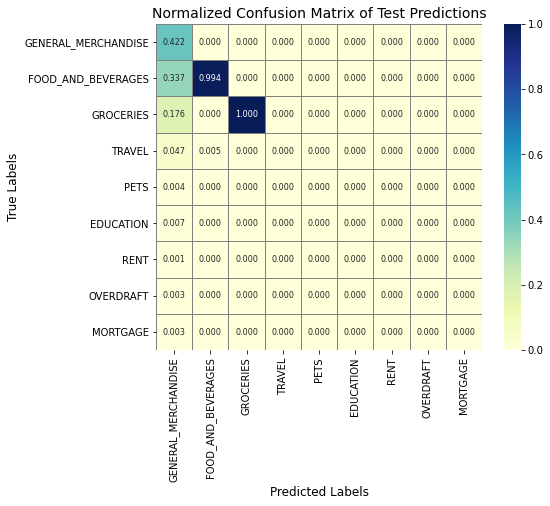

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=y_test.unique(), normalize='pred')
class_labels = y_test.value_counts().sort_values(ascending=False).index
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', square=True, annot_kws={"size": 8})

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Normalized Confusion Matrix of Test Predictions", fontsize=14)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X = outflows_encoded.drop(columns=['category','prism_consumer_id', 'prism_account_id', 'memo', 'clean_memo', 'posted_date', 'amount'])
y = outflows_encoded['category']  # target variable



In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [59]:
y_pred_rf = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {rf_acc:.4f}, F1 Score: {rf_f1:.4f}")

Random Forest - Accuracy: 0.6529, F1 Score: 0.6472


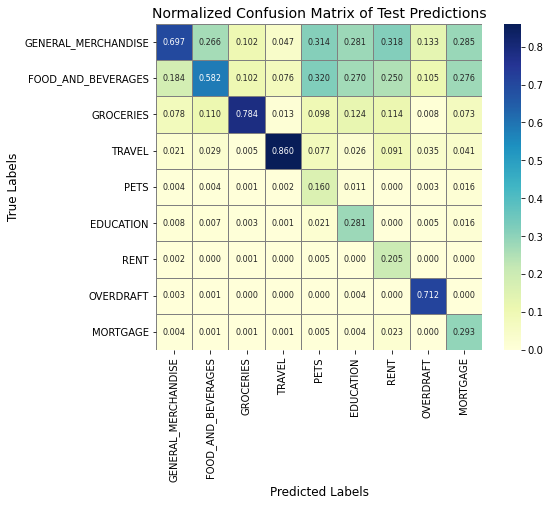

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=y_test.unique(), normalize='pred')
class_labels = y_test.value_counts().sort_values(ascending=False).index
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True,
            linewidths=0.5, linecolor='gray', square=True, annot_kws={"size": 8})

plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Normalized Confusion Matrix of Test Predictions", fontsize=14)
plt.show()